0.9761727475800447
0.7975797579757976
0.857036485480268
0.8294829482948295
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4171
           1       0.69      0.50      0.58      1283

    accuracy                           0.83      5454
   macro avg       0.77      0.72      0.74      5454
weighted avg       0.82      0.83      0.82      5454

[[3187  990]
 [ 984  293]]


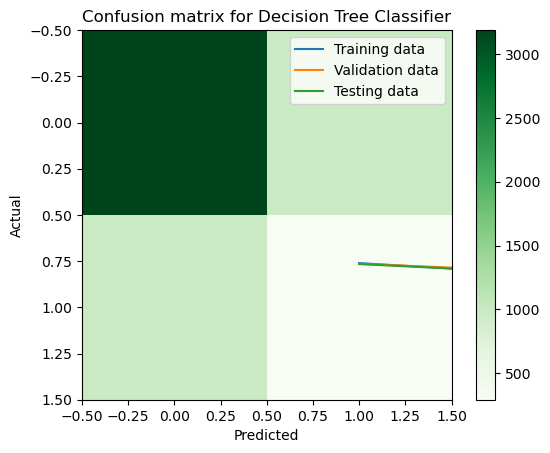

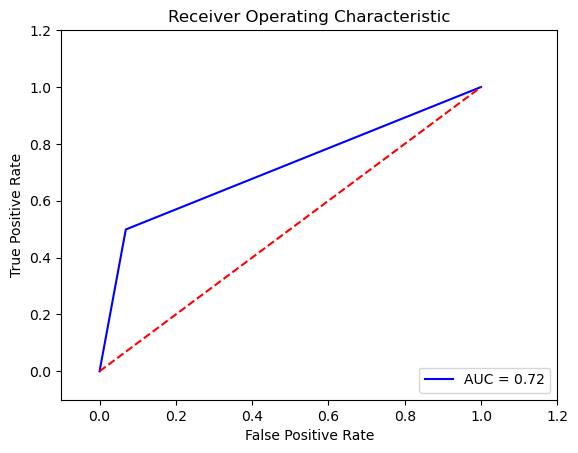

[0.         0.06880844 1.        ]
[0.         0.49883087 1.        ]


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

data = pd.read_csv("discritized.csv")
data['class'] = (data['class']== ' >50K.')*1
y = data[['class']].copy()
x= data.drop('class', axis=1)

# print(data1.head())
#print(x.head())
#print(y.head(),'Hi')

for label in x.columns:
  x[label]= LabelEncoder().fit_transform(x[label])
# use an encoder
x_train, x_test_valid, y_train, y_test_valid= train_test_split(x,y,test_size= 0.67,random_state=0)
x_val, x_test, y_val, y_test= train_test_split(x_test_valid,y_test_valid,test_size= 0.5,random_state=0)
# print('head of val')


# print(x_train.head())
# print(y_train.head(),'Ok')



# Train your decision tree model on the training data
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

#training accuracy
y_tr_pred = classifier.predict(x_train)
tr_accuracy = accuracy_score(y_train, y_tr_pred)
print(tr_accuracy)

# Evaluate the model's performance on the validation set
y_val_pred = classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)



x_ax=[]
y_ax_test=[]
y_ax_train=[]
y_ax_valid=[]
min=1
for n in range(1,33,1):
    model = DecisionTreeClassifier(max_depth=n, criterion='entropy', random_state=0)
    model.fit(x_train,y_train)
    x_ax.append(n)
    y_ax_test.append(model.score(x_test,y_test))
    y_ax_train.append(model.score(x_train,y_train))
    y_ax_valid.append(model.score(x_val,y_val))

plt.plot(x_ax,y_ax_train)
plt.plot(x_ax,y_ax_valid)
plt.plot(x_ax,y_ax_test)
plt.legend(['Training data','Validation data','Testing data'])
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Accuracy")


#prune to 5 nodes
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

#training accuracy
y_tr_pred = classifier.predict(x_train)
tr_accuracy = accuracy_score(y_train, y_tr_pred)
print(tr_accuracy)

# Evaluate the model's performance on the validation set
y_val_pred = classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_val)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Greens')
plt.title('Confusion matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

# Calculate ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_val_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(false_positive_rate)
print(true_positive_rate)